# Implementing the Kalman Model

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from math import sqrt
from datetime import datetime
import datetime
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from math import sqrt


# extract data from various Internet sources into a pandas DataFrame
import pandas_datareader as web

In [16]:
!pip install pandas_datareader

In [2]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 1, 1)
df_amzn = web.DataReader('PFE', 'yahoo', start, end) 
amzn= df_amzn
amzn=amzn.reset_index()
amzn['Date'] = pd.to_datetime(amzn['Date'])

# corresponding csv file is saved in an ouput directory 
#df_amzn.to_csv('data/data.csv')
amzn

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-02,29.032257,28.776091,28.908918,28.899431,18366266.0,22.159529
1,2014-01-03,29.250475,28.823528,28.833017,28.956356,15847312.0,22.203180
2,2014-01-06,29.364326,28.965843,29.193548,28.984819,25255421.0,22.225004
3,2014-01-07,29.430740,29.165085,29.278936,29.165085,23423042.0,22.363232
4,2014-01-08,29.402277,29.079697,29.203035,29.364326,24161053.0,22.515999
...,...,...,...,...,...,...,...
1253,2018-12-24,39.810246,38.444023,39.667931,38.472485,19778205.0,35.255787
1254,2018-12-26,40.037952,38.349148,38.576851,40.028461,25437131.0,36.681675
1255,2018-12-27,40.654648,39.146111,39.667931,40.654648,28894672.0,37.255508
1256,2018-12-28,41.309299,40.616699,40.815941,40.759014,25480977.0,37.351147


In [3]:
amzn.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [4]:
amzn.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,32.508590,32.012539,32.258223,32.266738,2.705481e+07,27.197739
std,3.395418,3.325488,3.342830,3.370563,1.486229e+07,4.102544
min,26.537003,26.100569,26.385199,26.280834,6.742754e+06,20.681654
25%,30.351044,29.810247,30.094877,30.085388,1.897630e+07,24.076509
50%,32.172676,31.722012,31.954459,31.916510,2.399768e+07,26.507644
75%,33.885199,33.403699,33.586338,33.643265,3.116443e+07,29.420433
max,44.089184,43.415562,43.994308,43.861481,2.998294e+08,40.194218


In Stock trading, the **high**, **low** refers to the maximum and the minimum prices in a given time period. **Open** and **Close** are thhighLowOpenClosee prices at which a stock began and ended trading in the same period. **Volume** is the total amount of trading activity. Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.

In [5]:
def Kalman_Filter(Y):
    S = Y.shape[0]
    S = S + 1
    "Initialize Params:"
    Z = param0[0]
    T = param0[1]
    H = param0[2]
    Q = param0[3]
    # "Kalman Filter Starts:"
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)
    v = np.zeros(S)
    F = np.zeros(S)
    KF_Dens = np.zeros(S)
    for s in range(1,S):
        if s == 1: 
            P_update[s] = 1000
            P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
        else: 
            F[s]= Z*P_predict[s-1]*np.transpose(Z)+H
            v[s] = Y[s-1] - Z*u_predict[s-1]
            u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_predict[s];
            P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1]
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q
            Likelihood = np.sum(KF_Dens[1:-1])  
            return Likelihood

In [6]:
def Kalman_Smoother(params, Y):
    S = Y.shape[0]
    S = S + 1
    "Initialize Params:"
    Z = params[0]
    T = params[1]
    H = params[2]
    Q = params[3]
    "Kalman Filter Starts:"
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)
    v = np.zeros(S)
    F = np.zeros(S)
    for s in range(1,S):
        if s == 1: 
            P_update[s] = 1000
            P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
        else: 
            # "Please fill this part."
            F[s]= Z*P_predict[s-1]*np.transpose(Z)+H
            v[s] = Y[s-1] - Z*u_predict[s-1]
            u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_predict[s];
            P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1]
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q
    
    
            u_smooth = np.zeros(S)
            P_smooth = np.zeros(S)
            u_smooth[S-1] = u_update[S-1]
            P_smooth[S-1] = P_update[S-1]    
    for  t in range(S-1,0,-1):
     
        u_smooth[t-1] = u_update[t] +P_update[t]*np.transpose(T)/P_predict[t]*(u_smooth[t]- T*u_update[t])
        P_smooth[t-1] = P_update[t] + (P_update[t]*np.transpose(T)/P_predict[t]*(P_smooth[t]-P_update[t])/P_update[t]*T*P_update[t])
    
    u_smooth = u_smooth[0:-1]
    return u_smooth

In [7]:
# amzn = pd.read_csv("AMZN.csv")
# amzn['Typical_Price'] = amzn[['High','Low','Close']].mean(axis=1)
# amzn['lrets'] = (np.log(amzn.Close) - np.log(amzn.Close.shift(1))) * 100.
# amzn.head()

F:\anaconda\lib\site-packages\ipykernel_launcher.py:7: OptimizeWarning: Unknown solver options: xtol
  import sys


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 6
         Gradient evaluations: 1


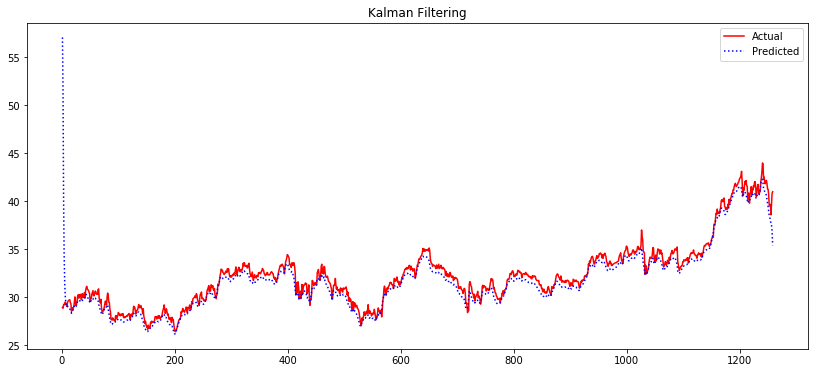

In [8]:
Y = amzn['Open']
T = Y.shape[0]
mu = 1196;


param0 = np.array([0.3, 0.9, 0.8, 1.1])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x, Y)

timevec = np.linspace(1,T,T)


fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, u,'b:', label='Predicted')
plt.legend(loc='upper right')
plt.title("Kalman Filtering")
plt.show()

F:\anaconda\lib\site-packages\ipykernel_launcher.py:7: OptimizeWarning: Unknown solver options: xtol
  import sys


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 6
         Gradient evaluations: 1


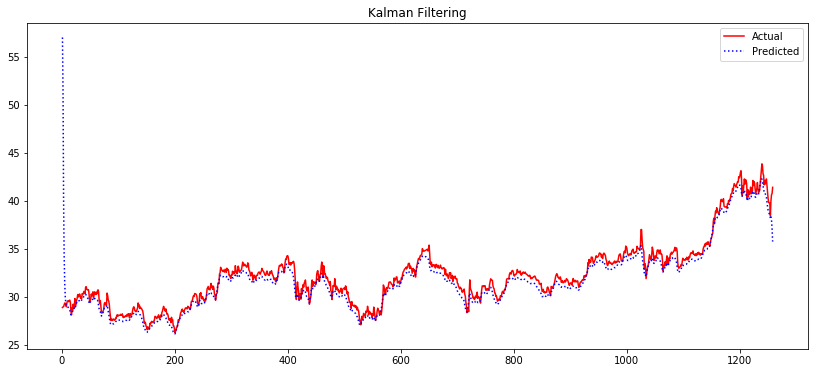

In [9]:
Y = amzn['Close']
T = Y.shape[0]
mu = 1196;


param0 = np.array([0.3, 0.9, 0.8, 1.1])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x, Y)

timevec = np.linspace(1,T,T)


fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, u,'b:', label='Predicted')
plt.legend(loc='upper right')
plt.title("Kalman Filtering")
plt.show()

In [10]:
results = pd.DataFrame({'Actual': list(Y),
                  'Predicted' : list(u),
                  'Date':amzn['Date'],
                  'Open':amzn['Open'],
                  'Close':amzn['Close']
                       })


In [11]:
results.set_index('Date',inplace = True)
results.head(10)

,Actual,Predicted,Open,Close
Date,,,,
2014-01-02,28.899431,57.021315,28.908918,28.899431
2014-01-03,28.956356,51.388877,28.833017,28.956356
2014-01-06,28.984819,40.121733,29.193548,28.984819
2014-01-07,29.165085,34.305827,29.278936,29.165085
2014-01-08,29.364326,31.420641,29.203035,29.364326
2014-01-09,29.345350,29.985111,29.487665,29.345350
2014-01-10,29.117647,29.289700,29.259962,29.117647
2014-01-13,28.975332,29.037638,29.278936,28.975332
2014-01-14,29.411764,29.043243,29.013283,29.411764


In [12]:
dif = pd.DataFrame({'Actual':list(Y),
                     'Predicted':list(u)})

# Long Short Day trading:
* if predicted > yesterdays close, buy and sell at end of day

* if predicted < yesterdays close, sell and buy at end of day

In [13]:
amount = 10000
signal = 0
Amount = []
balance = 0
action = []
portfolio = 0
Portfolio = []
stocks = 0
Stocks = []

for i in range(len(results)):
    if results['Predicted'][i] > results['Actual'][i-1]:
        action.append('Buy at Open')
        stocks = int(amount/results['Open'][i])
        balance = int(amount%results['Close'][i])
        portfolio = stocks * results ['Open'][i]
        print(i,'Buy at Open',round(portfolio,2),stocks,round(balance,2))
        
        
        action.append('Sell at End')
        portfolio = stocks * results['Close'][i]
        signal = 0
        stocks = 0
        amount = balance + portfolio
        portfolio = 0
        balance = 0
        print(i,'Sell at Close',round(amount,2),balance)
        Amount.append(amount)
        
    else:
        action.append('Sell at Open')
        stocks = int(amount/results['Open'][i])
        balance = int(amount%results['Close'][i])
        portfolio = stocks * results ['Open'][i]
        print(i,'Sell at Open',round(portfolio,2),'-',stocks,round(balance,2))
        
        
        action.append('Buy at Close')
        portfolio = stocks * results['Close'][i]
        signal = 0
        stocks = 0
        amount = balance + portfolio
        portfolio = 0
        balance = 0
        print(i,'Buy Back at Close',round(amount,2),balance)
        Amount.append(amount)
    print('\n')
        

0 Buy at Open 9973.58 345 0
0 Sell at Close 9970.3 0


1 Buy at Open 9947.39 345 9
1 Sell at Close 9998.94 0


2 Buy at Open 9984.19 342 28
2 Sell at Close 9940.81 0


3 Buy at Open 9925.56 339 24
3 Sell at Close 9910.96 0


4 Buy at Open 9899.83 339 15
4 Sell at Close 9969.51 0


5 Buy at Open 9966.83 338 21
5 Sell at Close 9939.73 0


6 Sell at Open 9919.13 - 339 10
6 Buy Back at Close 9880.88 0


7 Sell at Open 9867.0 - 337 0
7 Buy Back at Close 9764.69 0


8 Buy at Open 9748.46 336 29
8 Sell at Close 9911.35 0


9 Sell at Open 9898.29 - 336 1
9 Buy Back at Close 9940.73 0


10 Sell at Open 9939.73 - 336 4
10 Buy Back at Close 9940.55 0


11 Sell at Open 9932.4 - 335 0
11 Buy Back at Close 9881.55 0


12 Sell at Open 9865.5 - 332 14
12 Buy Back at Close 9851.15 0


13 Sell at Open 9832.65 - 331 1
13 Buy Back at Close 9821.09 0


14 Sell at Open 9800.44 - 333 23
14 Buy Back at Close 9820.28 0


15 Sell at Open 9808.44 - 335 28
15 Buy Back at Close 9591.71 0


16 Sell at Open 9576.32 

220 Sell at Open 7868.82 - 273 28
220 Buy Back at Close 7886.46 0


221 Sell at Open 7860.6 - 277 4
221 Buy Back at Close 7972.35 0


222 Sell at Open 7955.17 - 275 20
222 Buy Back at Close 8001.26 0


223 Sell at Open 7994.63 - 277 1
223 Buy Back at Close 8000.89 0


224 Sell at Open 7999.75 - 278 1
224 Buy Back at Close 8029.77 0


225 Sell at Open 8023.01 - 275 27
225 Buy Back at Close 7971.73 0


226 Sell at Open 7965.61 - 275 0
226 Buy Back at Close 7884.72 0


227 Buy at Open 7882.12 275 21
227 Sell at Close 7970.95 0


228 Buy at Open 7967.84 274 4
228 Sell at Close 8088.82 0


229 Sell at Open 8063.08 - 273 20
229 Buy Back at Close 8088.26 0


230 Sell at Open 8086.22 - 276 21
230 Buy Back at Close 8206.73 0


231 Sell at Open 8203.04 - 275 29
231 Buy Back at Close 8265.95 0


232 Sell at Open 8248.58 - 276 12
232 Buy Back at Close 8326.04 0


233 Sell at Open 8324.17 - 278 2
233 Buy Back at Close 8355.19 0


234 Sell at Open 8347.91 - 278 8
234 Buy Back at Close 8445.59 0


23

391 Sell at Open 9560.83 - 288 10
391 Buy Back at Close 9513.45 0


392 Sell at Open 9495.32 - 289 22
392 Buy Back at Close 9415.87 0


393 Buy at Open 9401.61 290 0
393 Sell at Close 9448.39 0


394 Buy at Open 9447.72 285 23
394 Sell at Close 9581.59 0


395 Sell at Open 9560.08 - 284 13
395 Buy Back at Close 9648.52 0


396 Sell at Open 9647.82 - 285 21
396 Buy Back at Close 9682.34 0


397 Sell at Open 9675.94 - 284 0
397 Buy Back at Close 9716.36 0


398 Sell at Open 9709.47 - 282 10
398 Buy Back at Close 9682.01 0


399 Sell at Open 9656.38 - 281 20
399 Buy Back at Close 9647.05 0


400 Sell at Open 9616.39 - 281 29
400 Buy Back at Close 9578.73 0


401 Sell at Open 9552.94 - 280 2
401 Buy Back at Close 9345.07 0


402 Sell at Open 9343.07 - 280 30
402 Buy Back at Close 9378.39 0


403 Sell at Open 9353.7 - 280 18
403 Buy Back at Close 9411.55 0


404 Sell at Open 9387.11 - 281 15
404 Buy Back at Close 9378.11 0


405 Sell at Open 9362.63 - 283 15
405 Buy Back at Close 9511.88 0


568 Sell at Close 8197.64 0


569 Sell at Open 8183.82 - 265 23
569 Buy Back at Close 8259.62 0


570 Sell at Open 8254.22 - 265 26
570 Buy Back at Close 8197.25 0


571 Sell at Open 8176.28 - 265 28
571 Buy Back at Close 8045.88 0


572 Sell at Open 8020.4 - 265 10
572 Buy Back at Close 8045.48 0


573 Buy at Open 8035.48 265 18
573 Sell at Close 8199.31 0


574 Sell at Open 8197.04 - 266 21
574 Buy Back at Close 8260.94 0


575 Sell at Open 8239.94 - 266 28
575 Buy Back at Close 8230.09 0


576 Sell at Open 8202.09 - 266 0
576 Buy Back at Close 8229.85 0


577 Sell at Open 8215.56 - 264 22
577 Buy Back at Close 8260.1 0


578 Sell at Open 8259.25 - 265 31
578 Buy Back at Close 8385.79 0


579 Sell at Open 8374.78 - 267 28
579 Buy Back at Close 8448.38 0


580 Sell at Open 8422.91 - 267 20
580 Buy Back at Close 8447.98 0


581 Sell at Open 8423.95 - 268 3
581 Buy Back at Close 8447.29 0


582 Sell at Open 8441.75 - 268 12
582 Buy Back at Close 8415.61 0


583 Sell at Open 8385.81 - 26

775 Sell at Open 6825.73 - 232 1
775 Buy Back at Close 6985.21 0


776 Sell at Open 6965.68 - 233 14
776 Buy Back at Close 7015.05 0


777 Sell at Open 6986.7 - 234 0
777 Buy Back at Close 7044.42 0


778 Sell at Open 7024.24 - 231 11
778 Buy Back at Close 7044.01 0


779 Sell at Open 7043.64 - 232 10
779 Buy Back at Close 7104.27 0


780 Sell at Open 7083.42 - 231 12
780 Buy Back at Close 7042.82 0


781 Sell at Open 7026.03 - 232 29
781 Buy Back at Close 7103.46 0


782 Sell at Open 7074.46 - 232 6
782 Buy Back at Close 7133.29 0


783 Sell at Open 7103.14 - 231 12
783 Buy Back at Close 7101.99 0


784 Buy at Open 7078.94 230 16
784 Sell at Close 7132.03 0


785 Buy at Open 7129.44 231 16
785 Sell at Close 7193.66 0


786 Buy at Open 7184.23 231 8
786 Sell at Close 7352.22 0


787 Sell at Open 7331.07 - 231 15
787 Buy Back at Close 7383.33 0


788 Sell at Open 7361.76 - 231 15
788 Buy Back at Close 7383.33 0


789 Sell at Open 7357.37 - 231 15
789 Buy Back at Close 7383.33 0


790 Se

971 Sell at Open 8121.01 - 242 5
971 Buy Back at Close 8119.12 0


972 Sell at Open 8087.7 - 243 3
972 Buy Back at Close 8118.37 0


973 Sell at Open 8092.32 - 243 7
973 Buy Back at Close 8117.76 0


974 Sell at Open 8086.57 - 242 12
974 Buy Back at Close 8116.93 0


975 Sell at Open 8093.45 - 242 27
975 Buy Back at Close 8150.3 0


976 Sell at Open 8133.81 - 243 31
976 Buy Back at Close 8183.26 0


977 Sell at Open 8181.18 - 244 18
977 Buy Back at Close 8250.11 0


978 Sell at Open 8221.68 - 245 28
978 Buy Back at Close 8249.68 0


979 Sell at Open 8224.0 - 245 32
979 Buy Back at Close 8249.03 0


980 Sell at Open 8228.65 - 245 21
980 Buy Back at Close 8282.2 0


981 Sell at Open 8273.91 - 246 12
981 Buy Back at Close 8281.24 0


982 Sell at Open 8254.22 - 245 31
982 Buy Back at Close 8280.57 0


983 Sell at Open 8256.55 - 245 31
983 Buy Back at Close 8280.57 0


984 Sell at Open 8272.82 - 245 15
984 Buy Back at Close 8348.25 0


985 Sell at Open 8320.08 - 244 0
985 Buy Back at Close 



1183 Sell at Open 10322.58 - 256 32
1183 Buy Back at Close 10439.59 0


1184 Sell at Open 10423.86 - 257 5
1184 Buy Back at Close 10480.07 0


1185 Sell at Open 10448.88 - 256 33
1185 Buy Back at Close 10479.45 0


1186 Sell at Open 10444.02 - 256 35
1186 Buy Back at Close 10602.89 0


1187 Sell at Open 10587.23 - 257 13
1187 Buy Back at Close 10561.22 0


1188 Sell at Open 10533.89 - 256 18
1188 Buy Back at Close 10644.19 0


1189 Sell at Open 10633.47 - 256 26
1189 Buy Back at Close 10727.48 0


1190 Sell at Open 10714.02 - 257 15
1190 Buy Back at Close 10726.58 0


1191 Sell at Open 10718.48 - 256 7
1191 Buy Back at Close 10642.9 0


1192 Sell at Open 10606.45 - 255 33
1192 Buy Back at Close 10600.74 0


1193 Sell at Open 10594.35 - 255 21
1193 Buy Back at Close 10641.97 0


1194 Sell at Open 10628.23 - 255 21
1194 Buy Back at Close 10683.1 0


1195 Sell at Open 10652.42 - 255 14
1195 Buy Back at Close 10724.48 0


1196 Sell at Open 10695.97 - 255 26
1196 Buy Back at Close 10724.3

In [14]:
results['Amount'] = list(Amount)

In [15]:
results['Returns'] = results['Amount'].pct_change()

In [16]:
results.head()

,Actual,Predicted,Open,Close,Amount,Returns
Date,,,,,,
2014-01-02,28.899431,57.021315,28.908918,28.899431,9970.303774,NaN
2014-01-03,28.956356,51.388877,28.833017,28.956356,9998.942837,0.002872
2014-01-06,28.984819,40.121733,29.193548,28.984819,9940.808239,-0.005814
2014-01-07,29.165085,34.305827,29.278936,29.165085,9910.963760,-0.003002
2014-01-08,29.364326,31.420641,29.203035,29.364326,9969.506676,0.005907


In [17]:
results.tail()

,Actual,Predicted,Open,Close,Amount,Returns
Date,,,,,,
2018-12-24,38.472485,38.208744,39.667931,38.472485,10632.405746,-0.031568
2018-12-26,40.028461,38.415284,38.576851,40.028461,11031.826900,0.037566
2018-12-27,40.654648,38.005101,39.667931,40.654648,11315.992096,0.025759
2018-12-28,40.759014,37.116400,40.815941,40.759014,11315.246914,-0.000066
2018-12-31,41.413662,35.764929,40.996204,41.413662,11439.170700,0.010952


#### Sharpe and is used to help investors understand the return of an investment compared to its risk. 1﻿﻿2﻿ The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.

In [18]:
mean_returns = results['Returns'].mean()
sd = results['Returns'].std()
print(mean_returns,sd)
Market_RF = 0.0464


Sharpe_Ratio = np.sqrt(878)*(mean_returns)/sd
Sharpe_Ratio

0.00015717190783428128 0.009778098722284585


0.47628594422237486

#### A good model should have an RMSE value less than 180.

#### RMSE Value of Amazon

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(results['Actual'], results['Predicted']))
rms

1.2785453561484914